In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

In [2]:
import xlsxwriter
from pandas import DataFrame
from matplotlib.font_manager import FontProperties
from matplotlib.pyplot import figure, show
from sklearn.metrics import accuracy_score


In [3]:
xl = pd.read_excel("D:\Cancer_Data_set.xlsx")


In [4]:
xl["Level"]=xl["Level"].map({"High":1,"Medium":2,"Low":3})


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [6]:
clf=RandomForestClassifier(n_estimators=100,max_depth=10,random_state=0)

In [7]:
X = xl.iloc[:,1:-1]
y= xl["Level"]
X.head()

,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,Balanced_Diet,Obesity,Smoking,...,Coughing_of_Blood,Fatigue,Weight_Loss,Shortness_of_breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring
0,33,1,2,4,5,4,3,2,4,3,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,6,7,2,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,7,7,8,...,9,3,2,4,1,4,2,4,2,3


In [41]:
y

0      3
1      2
2      1
3      1
4      1
5      1
6      3
7      3
8      2
9      2
10     1
11     1
12     2
13     1
14     3
15     2
16     2
17     1
18     1
19     2
20     1
21     1
22     1
23     1
24     1
25     2
26     2
27     2
28     1
29     2
      ..
970    2
971    2
972    2
973    2
974    2
975    1
976    3
977    3
978    1
979    3
980    1
981    1
982    1
983    2
984    2
985    1
986    1
987    1
988    1
989    1
990    1
991    1
992    1
993    1
994    1
995    1
996    1
997    1
998    1
999    1
Name: Level, Length: 1000, dtype: int64

In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.5)

In [9]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [10]:
clf.score(x_train,y_train)

1.0

In [11]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 3, 1, 2, 3, 1, 2, 1, 2, 1, 3, 2, 1, 1, 1, 2, 2, 2, 3, 1, 1,
       1, 2, 1, 3, 1, 3, 3, 3, 3, 1, 3, 2, 2, 1, 1, 3, 3, 2, 3, 2, 3, 1,
       2, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 2, 3, 1, 1, 3, 2, 3, 3, 1,
       2, 1, 1, 1, 3, 1, 1, 1, 2, 1, 3, 1, 1, 3, 1, 1, 3, 2, 1, 3, 1, 2,
       1, 1, 2, 1, 1, 3, 2, 2, 2, 2, 1, 3, 3, 2, 2, 1, 2, 3, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 3, 3, 1, 2, 2, 2, 3, 1, 3, 2, 2, 1, 1, 3, 3, 2, 2,
       3, 2, 2, 3, 1, 2, 1, 2, 1, 3, 3, 1, 2, 2, 2, 3, 3, 1, 1, 1, 3, 3,
       1, 2, 1, 1, 1, 2, 2, 2, 1, 3, 1, 3, 2, 3, 3, 2, 3, 1, 3, 2, 1, 3,
       1, 2, 2, 1, 1, 2, 1, 3, 2, 3, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 3, 1,
       3, 2, 3, 3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 2, 3, 1, 1, 3,
       3, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 3, 2, 1, 1, 3, 1, 1, 2, 1, 1, 3,
       1, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 3, 2, 1, 3, 1, 2, 3, 2, 1, 2,
       3, 2, 3, 1, 2, 1, 2, 2, 1, 3, 2, 1, 1, 1, 2, 2, 2, 3, 2, 1, 2, 2,
       1, 1, 3, 2, 2, 3, 3, 1, 2, 1, 3, 2, 1, 2, 1,

In [12]:
clf.score(x_test,y_test)

1.0

In [13]:
import seaborn as sns  
from seaborn import countplot  


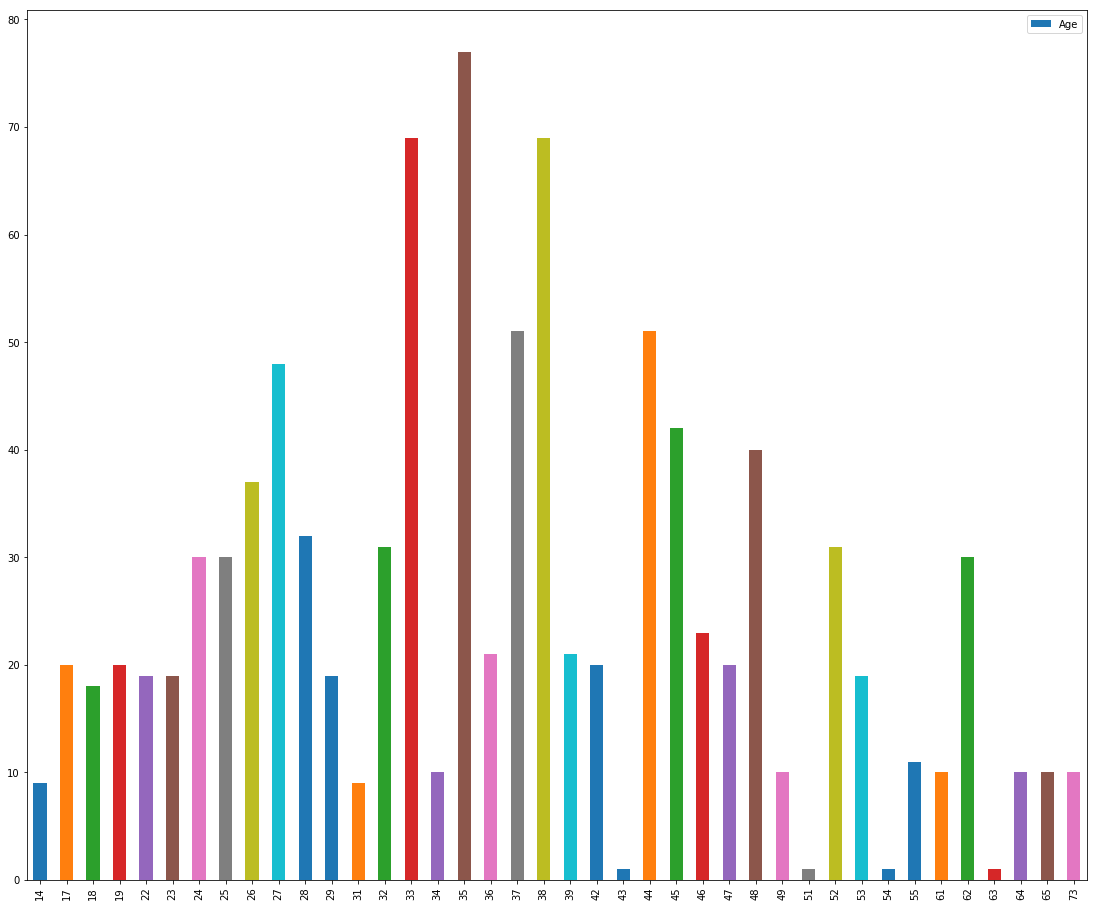

In [14]:
age =xl["Age"].value_counts().sort_index()
age.plot(kind='bar',figsize=(19,16),legend=True,linewidth=5.0)

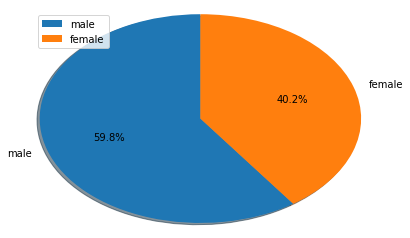

In [15]:
Gender =xl["Gender"].value_counts().sort_index()
lege=('male','female')
plt.pie(Gender, labels = lege,startangle=90, shadow = True, radius = 1.2, autopct = '%1.1f%%') 
plt.legend() 
plt.show()

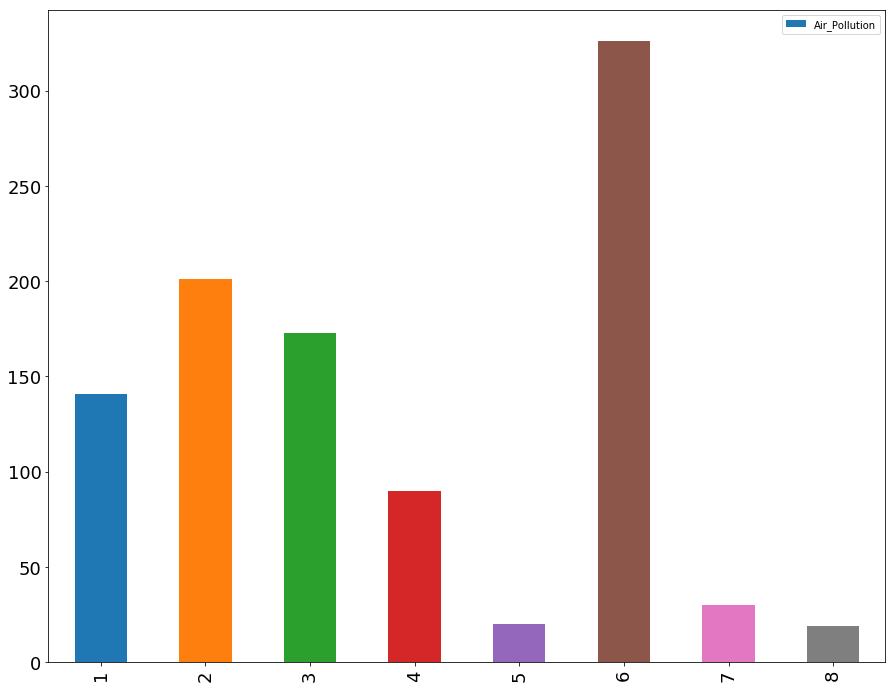

In [16]:
Air_Pollution =xl["Air_Pollution"].value_counts().sort_index()
Air_Pollution.plot(kind='bar',figsize=(15,12),legend=True,linewidth=5.0, fontsize=18)

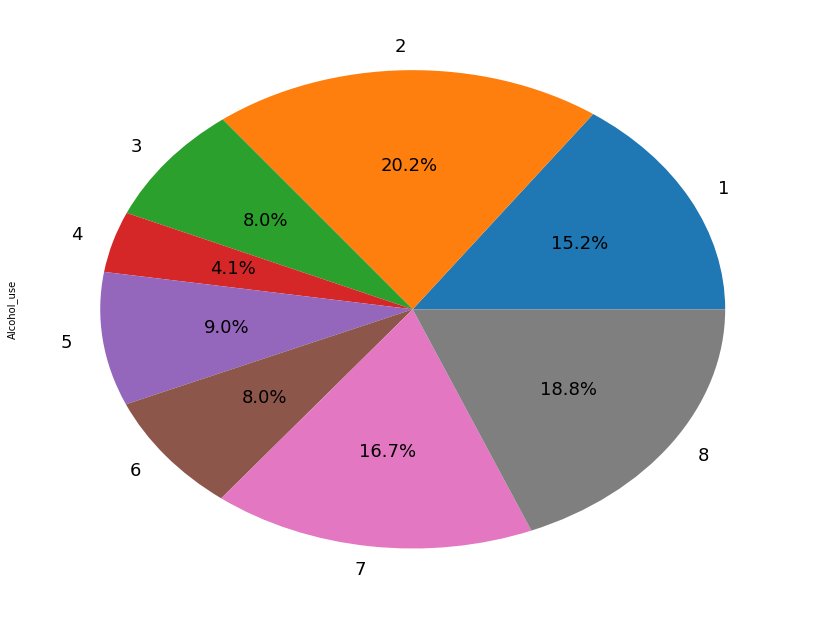

In [17]:
Alcohol_use =xl["Alcohol_use"].value_counts().sort_index()
Alcohol_use.plot(kind='pie',autopct = '%1.1f%%',figsize=(14,11),fontsize=18)

In [18]:
import seaborn as sns
from seaborn import countplot

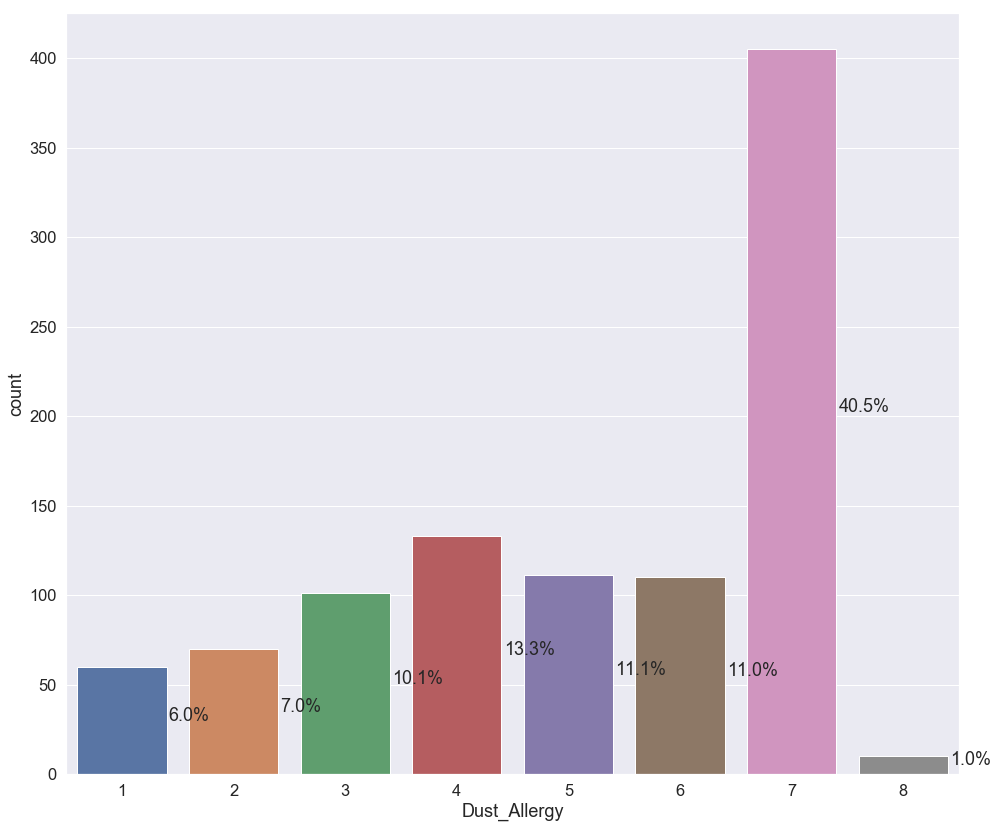

In [19]:
figure(figsize=(16, 14))
sns.set(font_scale=1.5)

ax = countplot(xl['Dust_Allergy'])
total = len(xl['Dust_Allergy'])

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

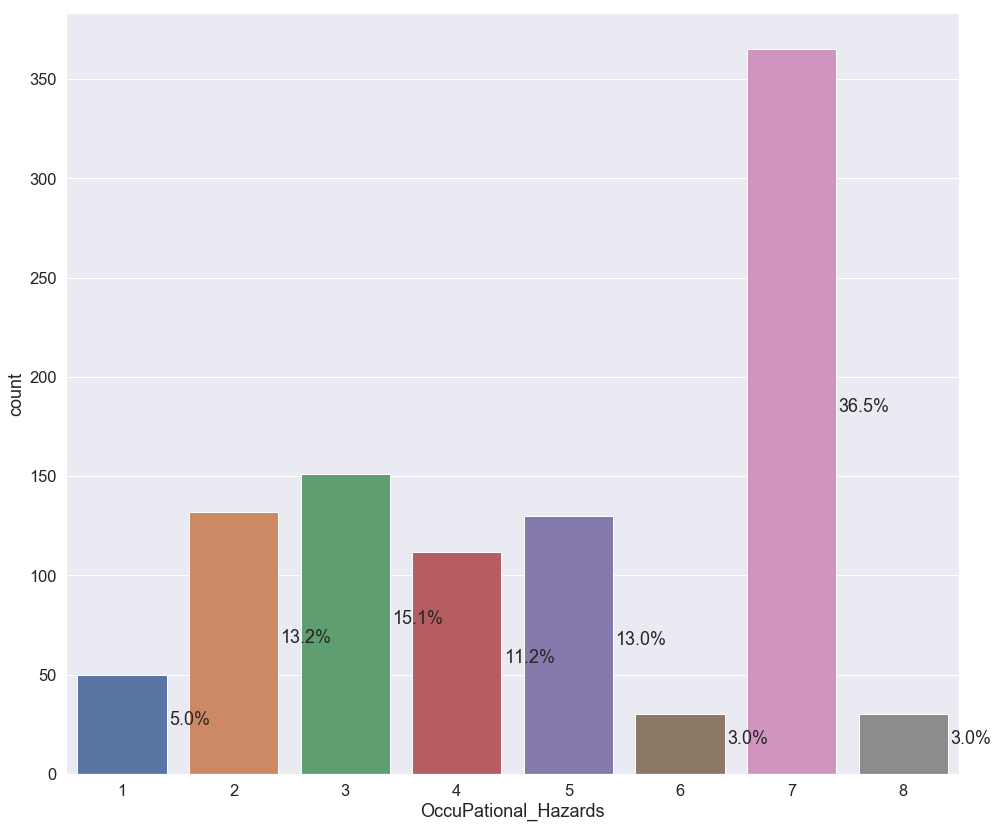

In [20]:
figure(figsize=(16, 14))
sns.set(font_scale=1.5)

ax = countplot(xl['OccuPational_Hazards'])
total = len(xl['OccuPational_Hazards'])

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

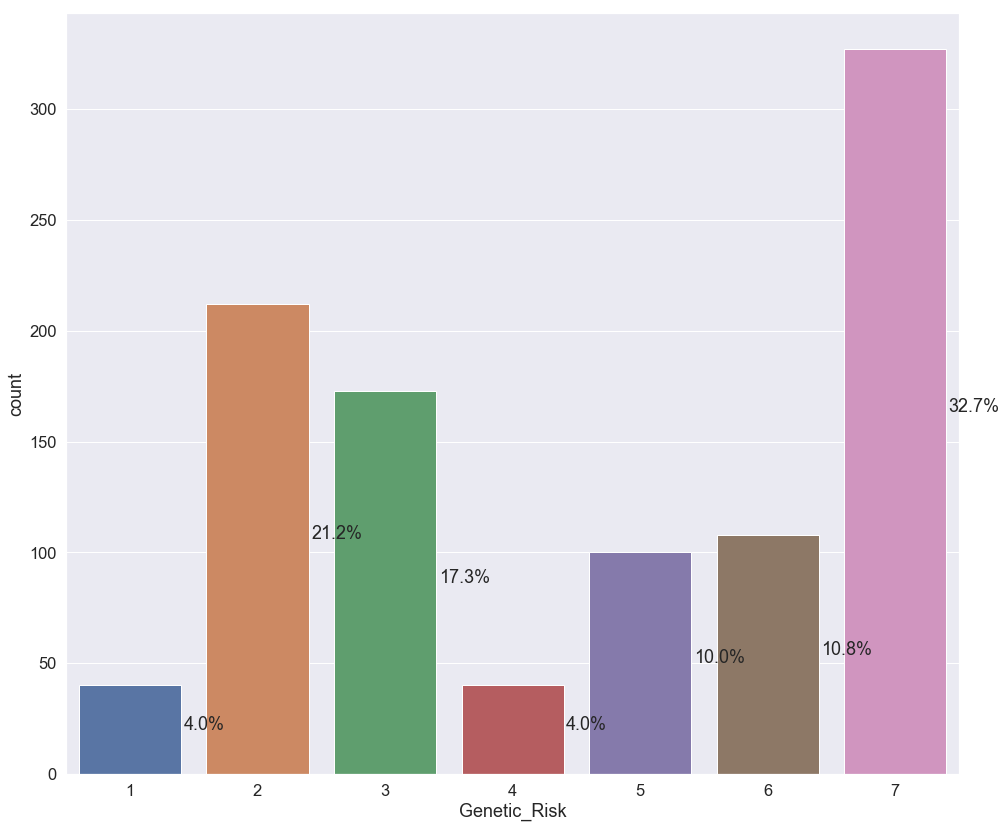

In [21]:
figure(figsize=(16, 14))
sns.set(font_scale=1.5)

ax = countplot(xl['Genetic_Risk'])
total = len(xl['Genetic_Risk'])

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

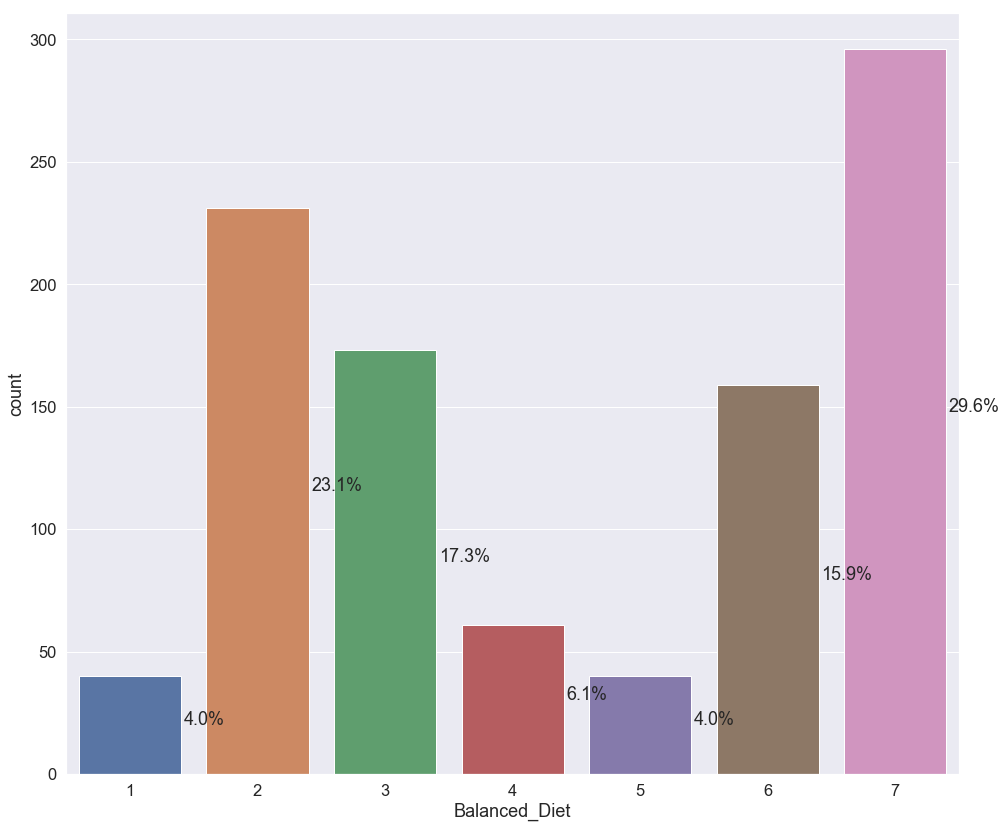

In [22]:
figure(figsize=(16, 14))
sns.set(font_scale=1.5)

ax = countplot(xl['Balanced_Diet'])
total = len(xl['Balanced_Diet'])

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

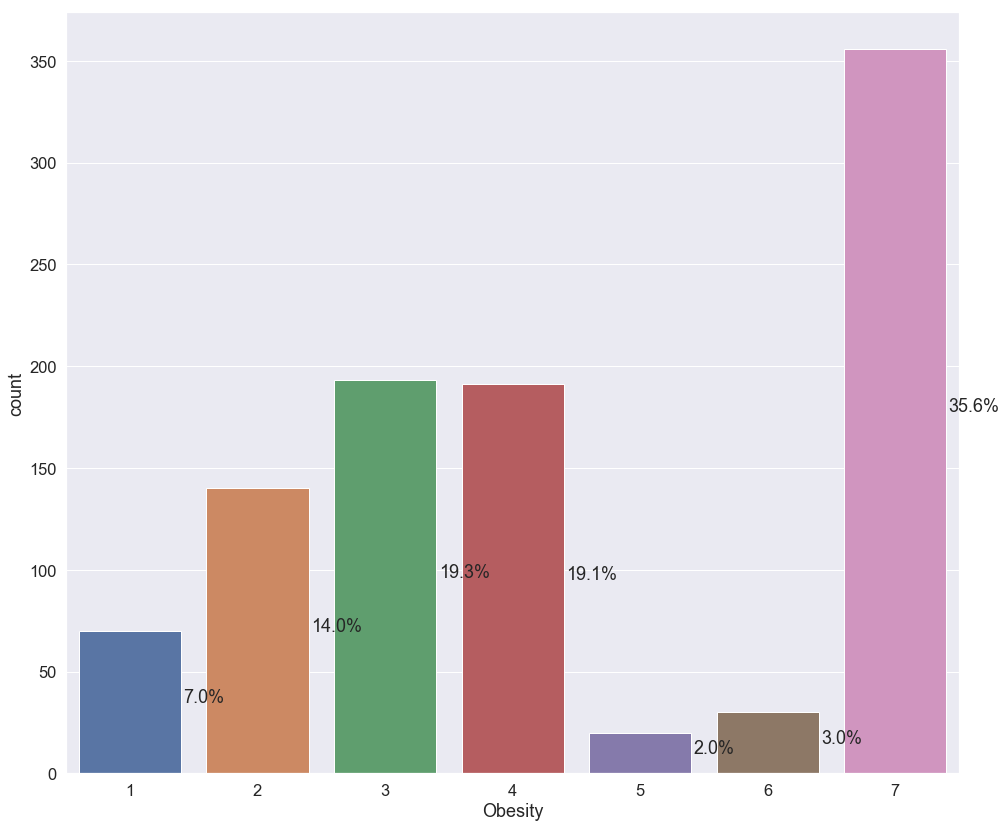

In [23]:
figure(figsize=(16, 14))
sns.set(font_scale=1.5)

ax = countplot(xl['Obesity'])
total = len(xl['Obesity'])

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

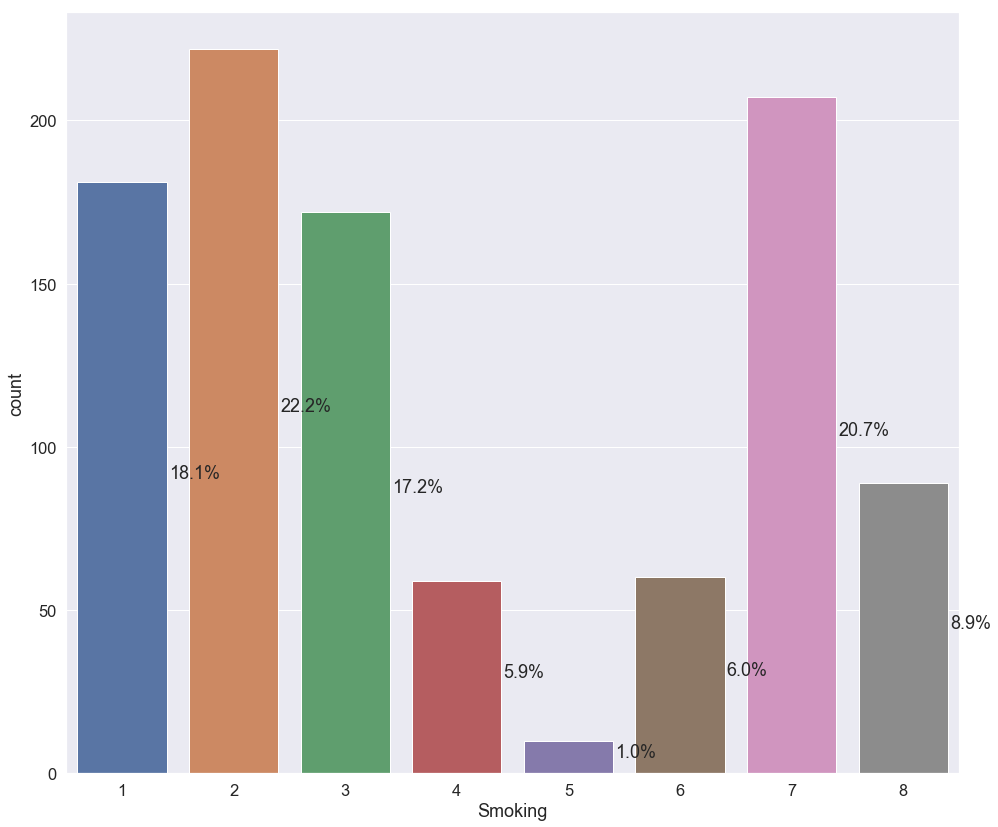

In [24]:
figure(figsize=(16, 14))
sns.set(font_scale=1.5)

ax = countplot(xl['Smoking'])
total = len(xl['Smoking'])

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

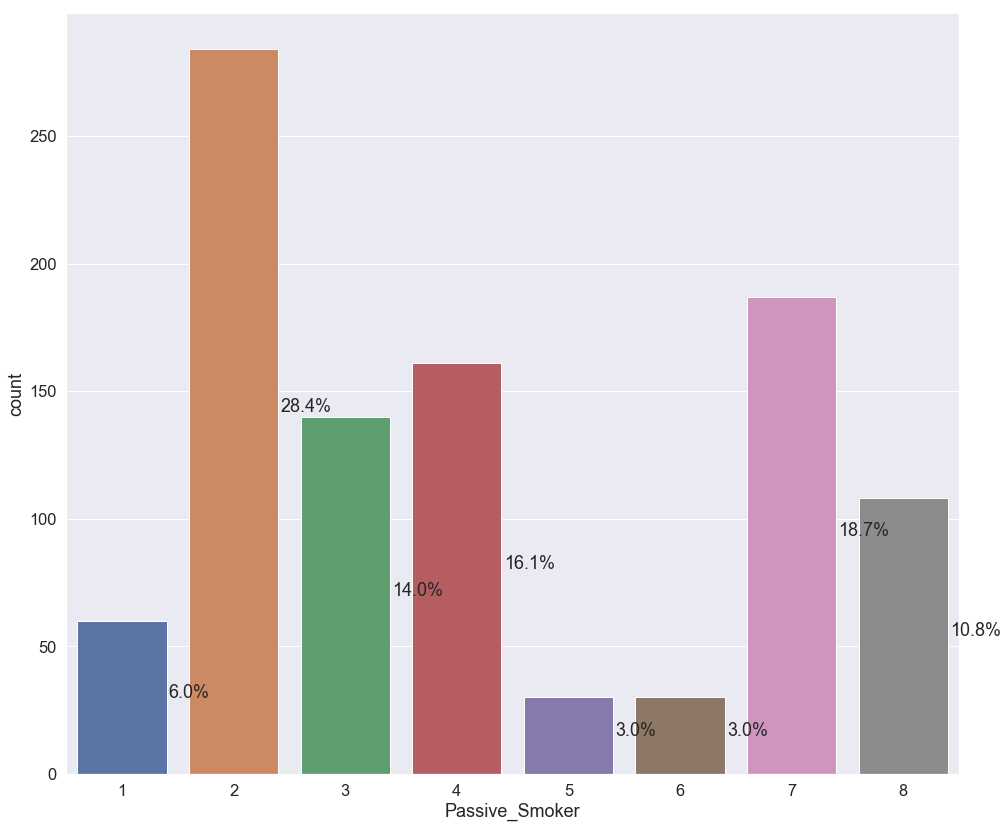

In [25]:
figure(figsize=(16, 14))
sns.set(font_scale=1.5)

ax = countplot(xl['Passive_Smoker'])
total = len(xl['Passive_Smoker'])

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

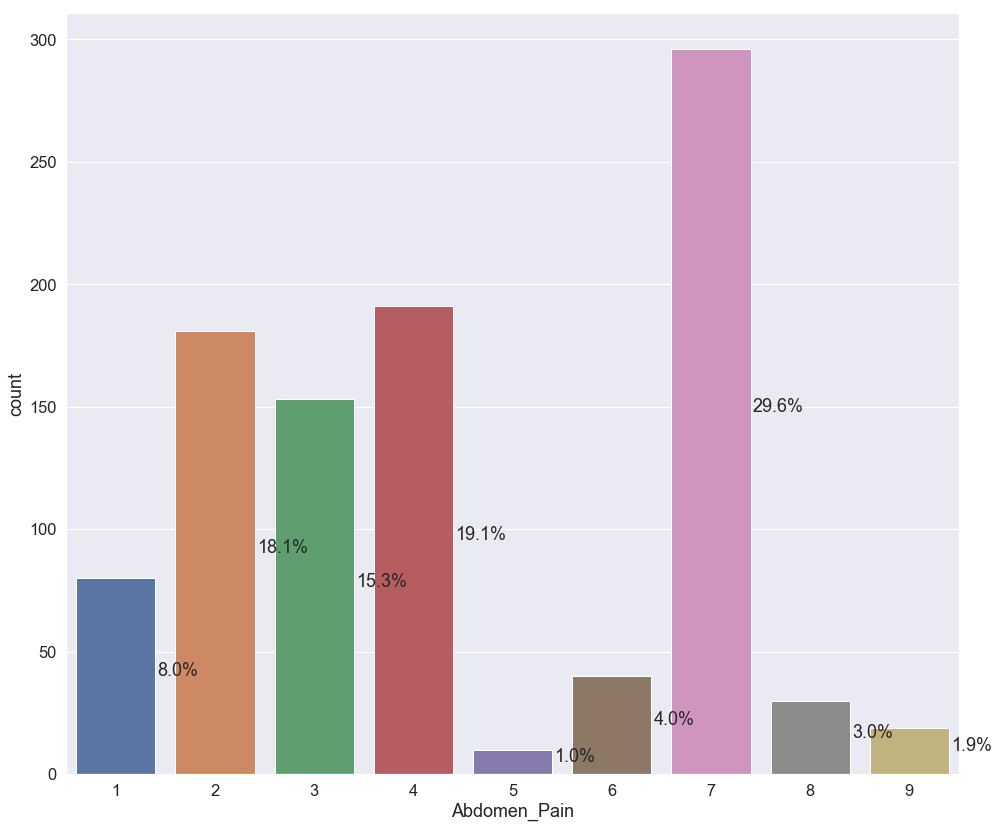

In [26]:
figure(figsize=(16, 14))
sns.set(font_scale=1.5)

ax = countplot(xl['Abdomen_Pain'])
total = len(xl['Abdomen_Pain'])

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

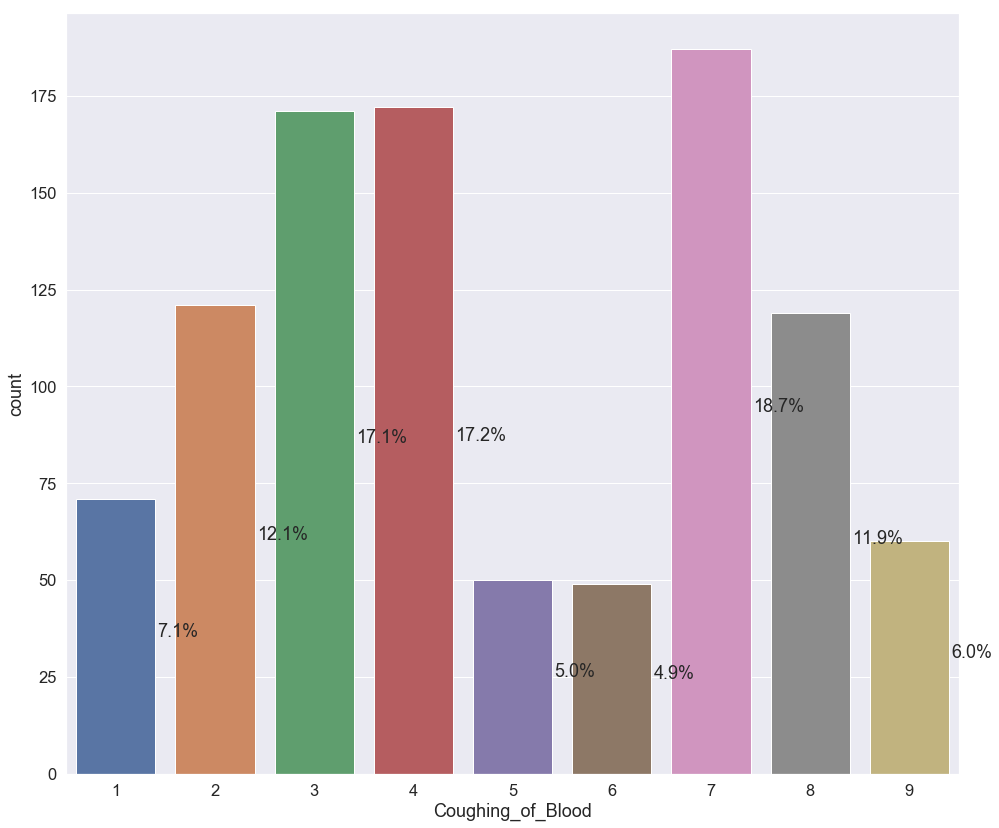

In [27]:
figure(figsize=(16, 14))
sns.set(font_scale=1.5)

ax = countplot(xl['Coughing_of_Blood'])
total = len(xl['Coughing_of_Blood'])

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

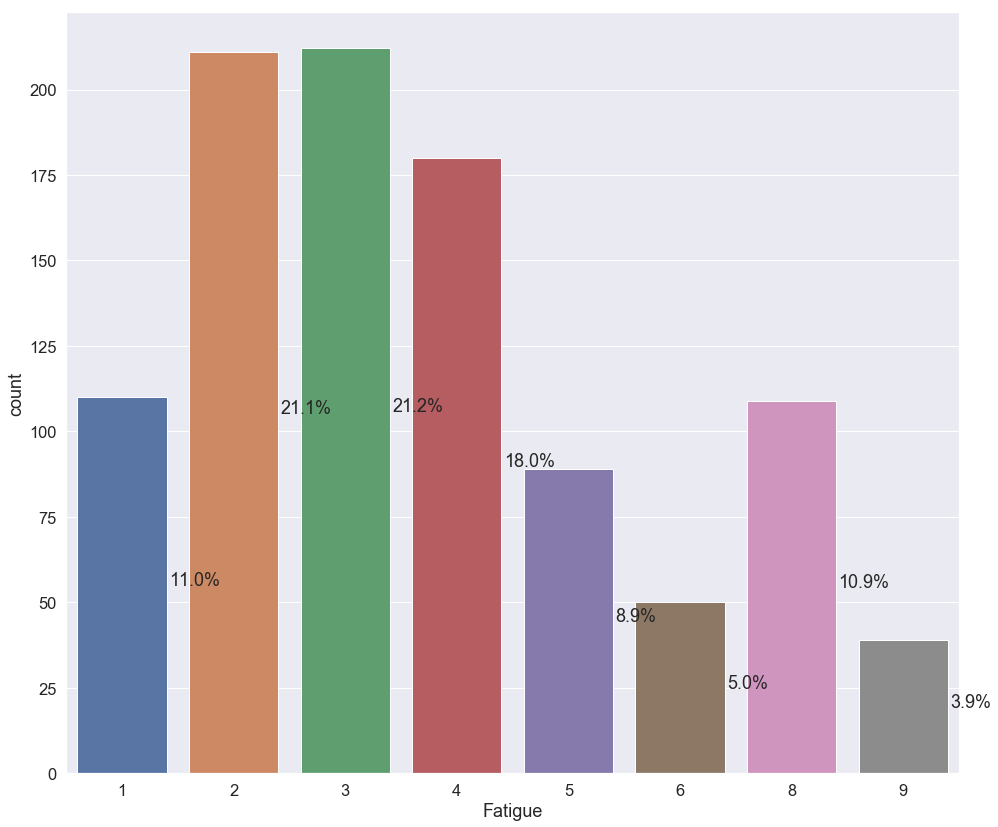

In [28]:
figure(figsize=(16, 14))
sns.set(font_scale=1.5)

ax = countplot(xl['Fatigue'])
total = len(xl['Fatigue'])

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

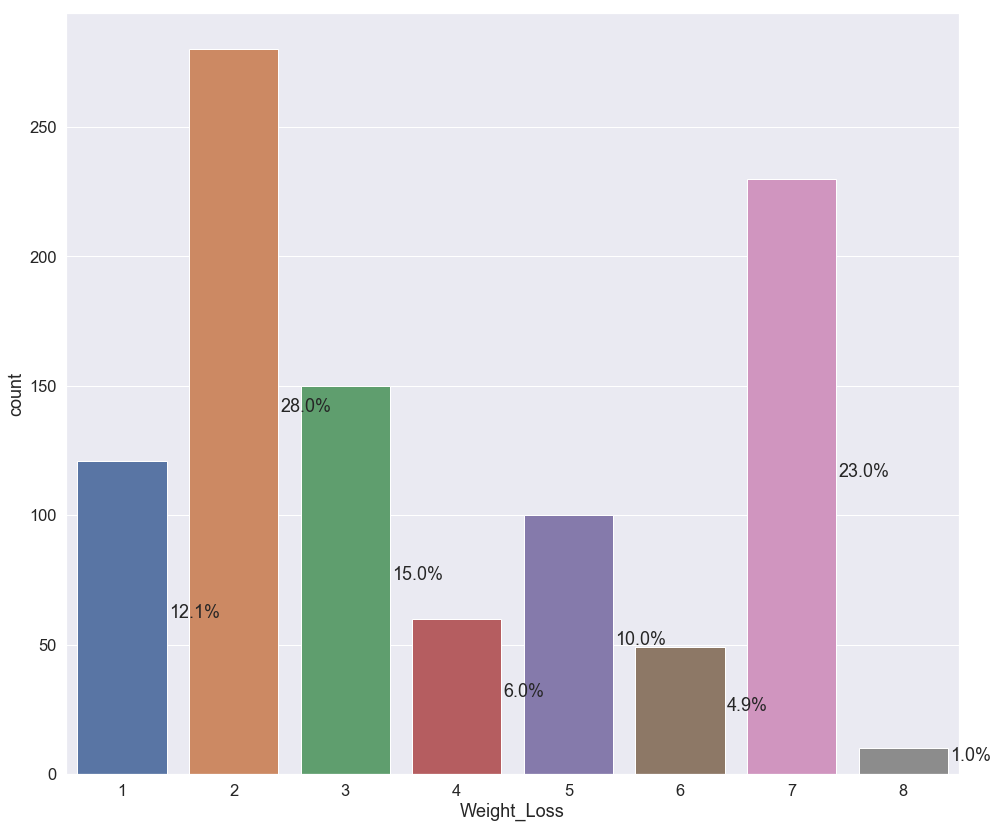

In [29]:

figure(figsize=(16, 14))
sns.set(font_scale=1.5)

ax = countplot(xl['Weight_Loss'])
total = len(xl['Weight_Loss'])

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

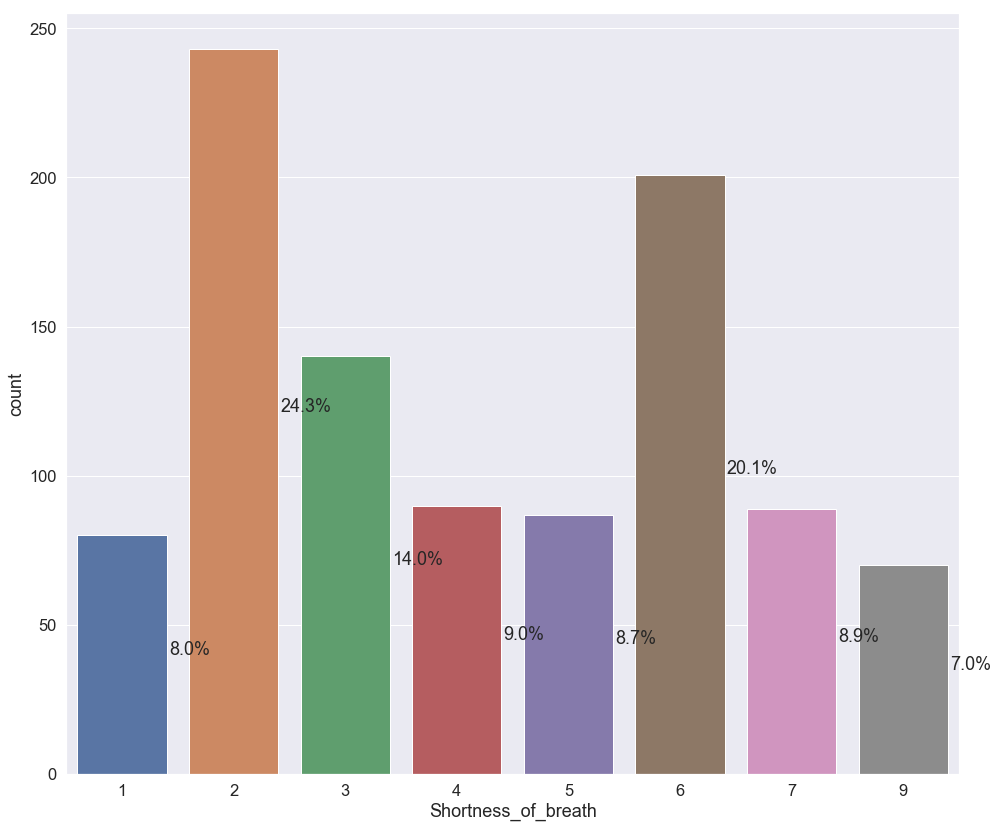

In [30]:
figure(figsize=(16, 14))
sns.set(font_scale=1.5)

ax = countplot(xl['Shortness_of_breath'])
total = len(xl['Shortness_of_breath'])

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

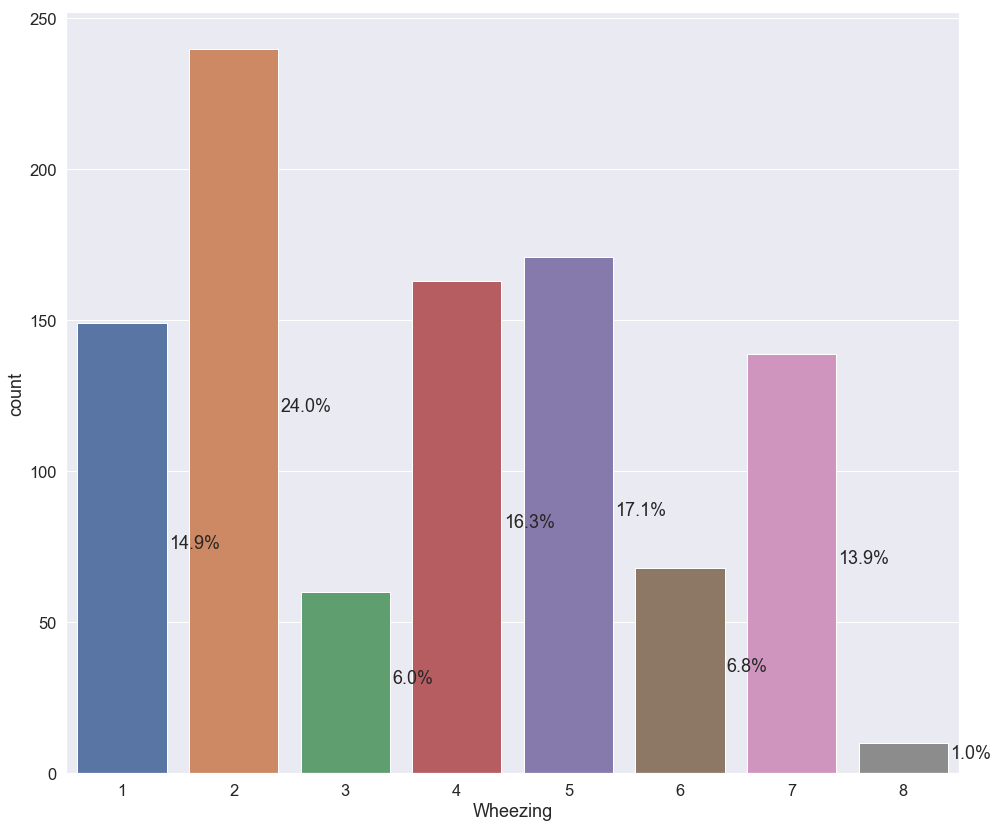

In [31]:
figure(figsize=(16, 14))
sns.set(font_scale=1.5)

ax = countplot(xl['Wheezing'])
total = len(xl['Wheezing'])

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

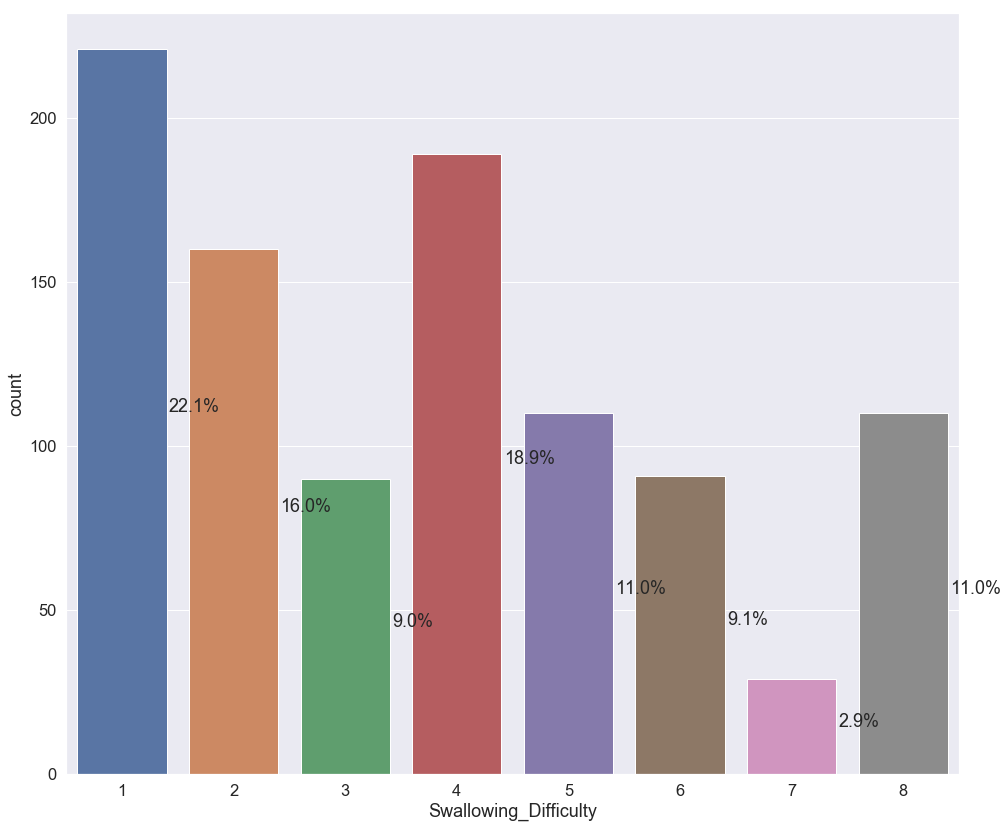

In [32]:
figure(figsize=(16, 14))
sns.set(font_scale=1.5)

ax = countplot(xl['Swallowing_Difficulty'])
total = len(xl['Swallowing_Difficulty'])

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

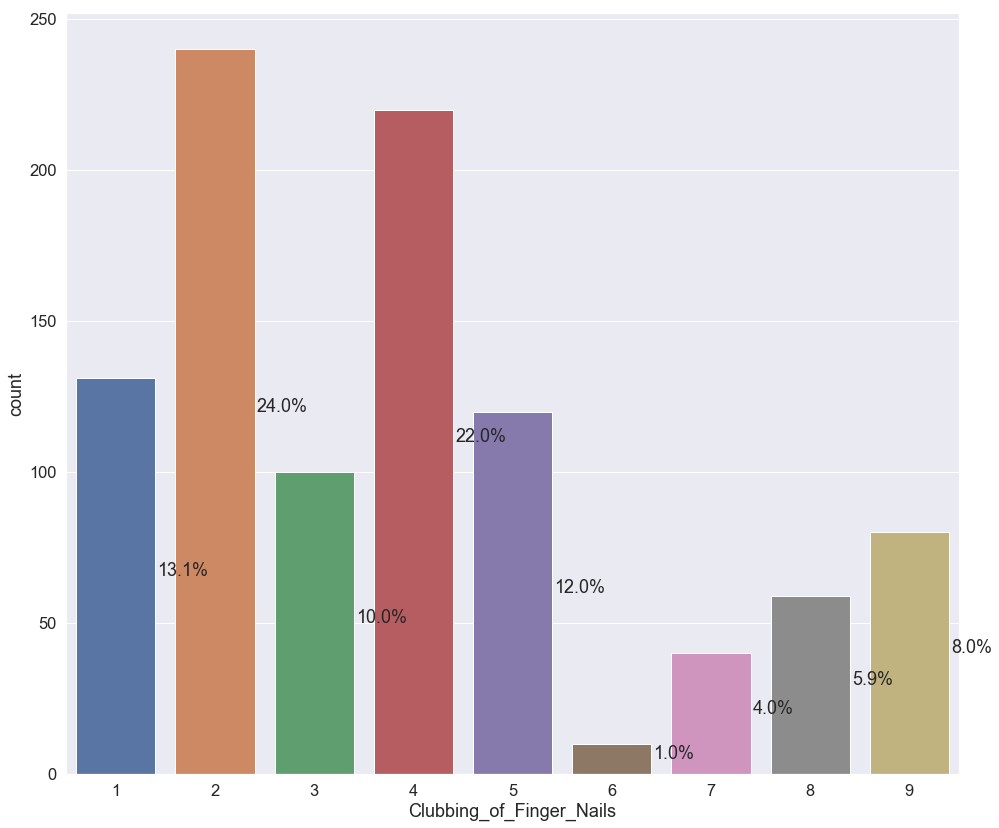

In [33]:
figure(figsize=(16, 14))
sns.set(font_scale=1.5)

ax = countplot(xl['Clubbing_of_Finger_Nails'])
total = len(xl['Clubbing_of_Finger_Nails'])

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

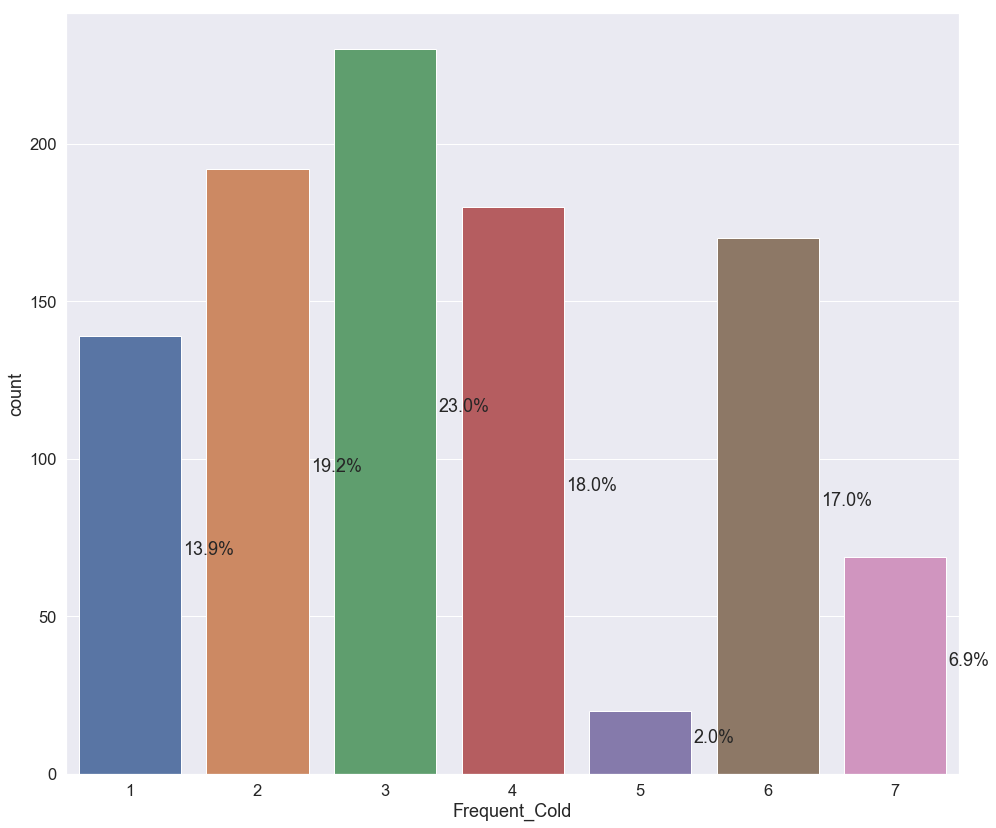

In [34]:
figure(figsize=(16, 14))
sns.set(font_scale=1.5)

ax = countplot(xl['Frequent_Cold'])
total = len(xl['Frequent_Cold'])

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

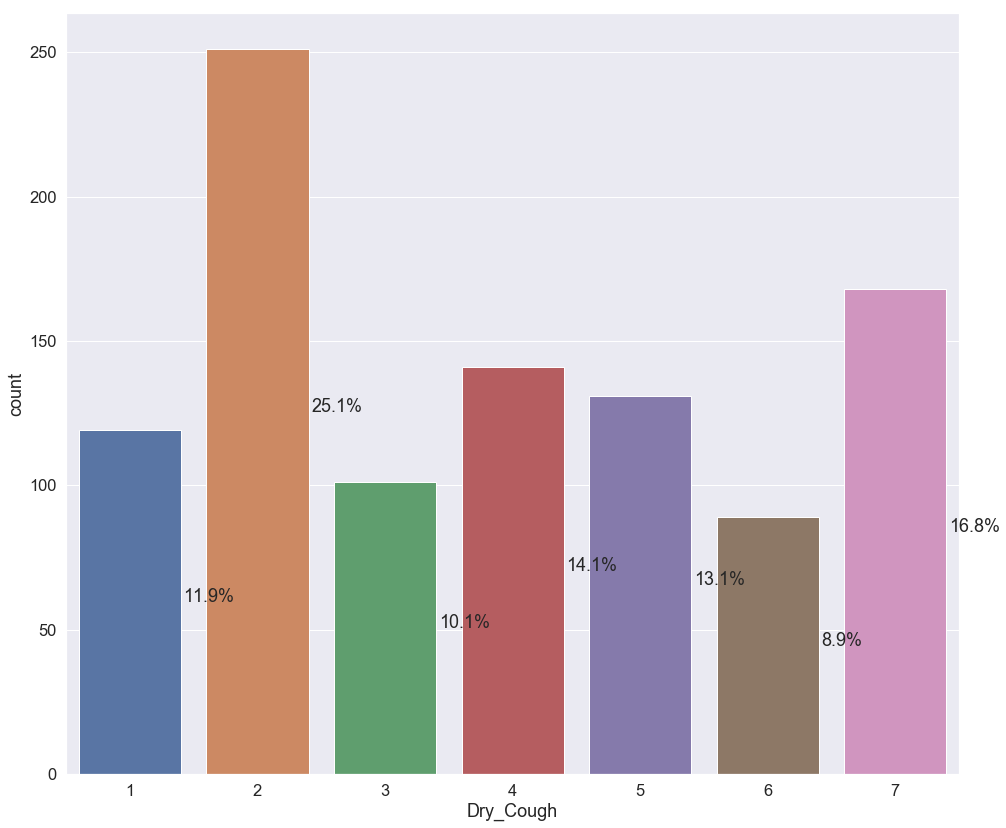

In [35]:
figure(figsize=(16, 14))
sns.set(font_scale=1.5)

ax = countplot(xl['Dry_Cough'])
total = len(xl['Dry_Cough'])

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

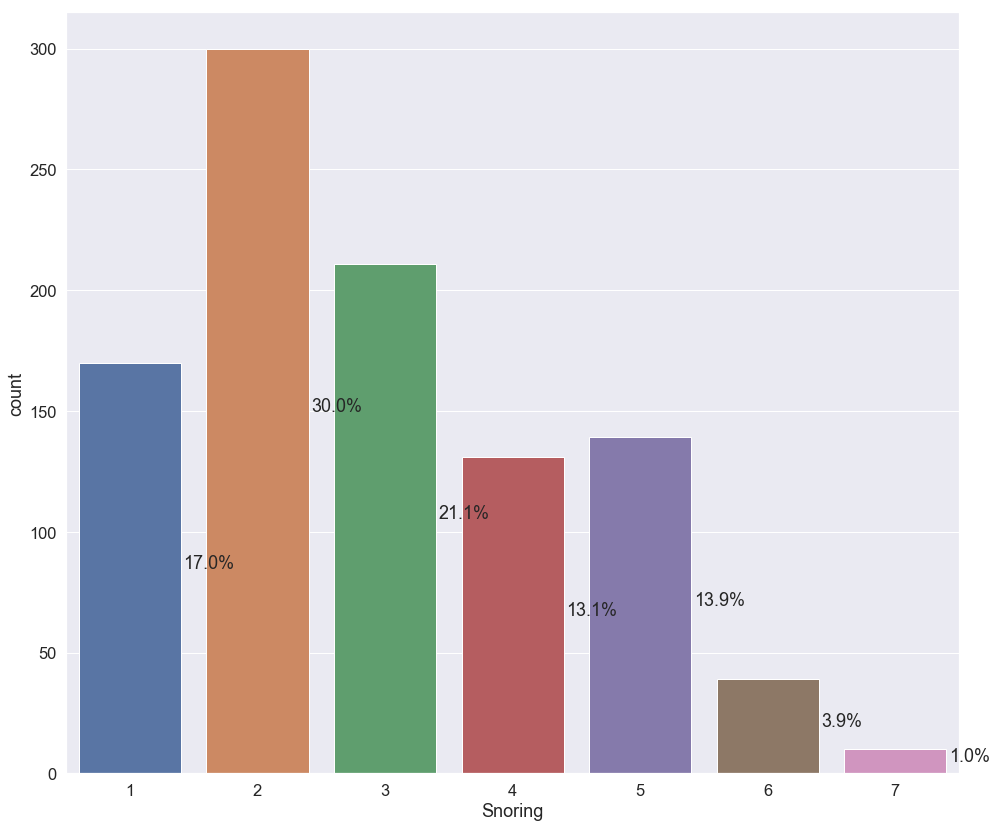

In [36]:
figure(figsize=(16, 14))
sns.set(font_scale=1.5)

ax = countplot(xl['Snoring'])
total = len(xl['Snoring'])

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

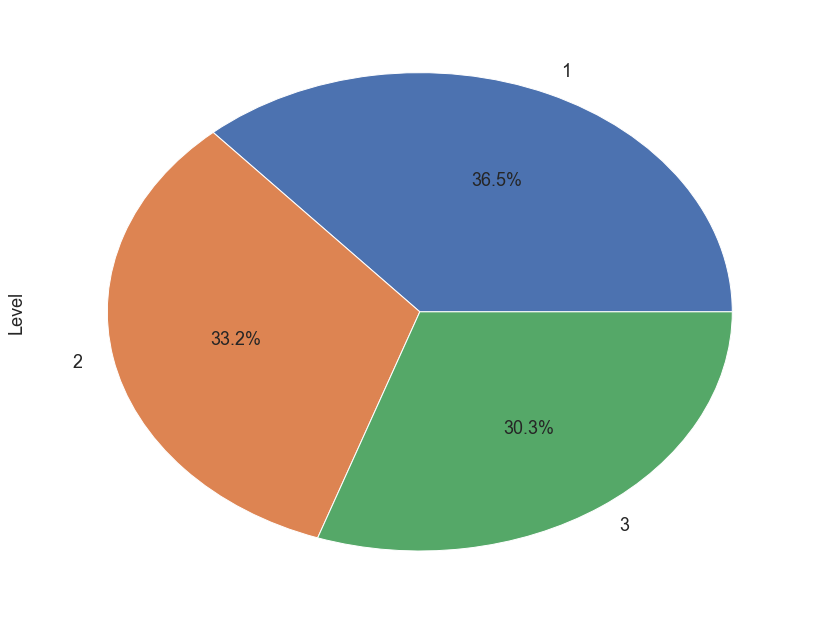

In [37]:
Level =xl["Level"].value_counts().sort_index()
Level.plot(kind='pie',autopct = '%1.1f%%',figsize=(14,11),fontsize=18)